<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка" data-toc-modified-id="Подготовка-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка</a></span><ul class="toc-item"><li><span><a href="#Импорты" data-toc-modified-id="Импорты-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Импорты</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Анализ" data-toc-modified-id="Анализ-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ</a></span><ul class="toc-item"><li><span><a href="#График-ресемплирования-данных" data-toc-modified-id="График-ресемплирования-данных-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>График ресемплирования данных</a></span></li><li><span><a href="#Тренд" data-toc-modified-id="Тренд-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Тренд</a></span></li><li><span><a href="#Сезонность" data-toc-modified-id="Сезонность-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Сезонность</a></span></li><li><span><a href="#Остаток-декомпозиции" data-toc-modified-id="Остаток-декомпозиции-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Остаток декомпозиции</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Обучение" data-toc-modified-id="Обучение-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Обучение</a></span><ul class="toc-item"><li><span><a href="#Признаки-для-обучения-моделей" data-toc-modified-id="Признаки-для-обучения-моделей-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Признаки для обучения моделей</a></span></li><li><span><a href="#Разделение-на-выборки" data-toc-modified-id="Разделение-на-выборки-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Разделение на выборки</a></span></li><li><span><a href="#LinearRegression" data-toc-modified-id="LinearRegression-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>LinearRegression</a></span></li><li><span><a href="#RandomForestRegression" data-toc-modified-id="RandomForestRegression-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>RandomForestRegression</a></span></li><li><span><a href="#LightGBM" data-toc-modified-id="LightGBM-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>LightGBM</a></span></li><li><span><a href="#CatBoost" data-toc-modified-id="CatBoost-3.6"><span class="toc-item-num">3.6&nbsp;&nbsp;</span>CatBoost</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-3.7"><span class="toc-item-num">3.7&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Тестирование" data-toc-modified-id="Тестирование-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование</a></span><ul class="toc-item"><li><span><a href="#RandomForestRegression" data-toc-modified-id="RandomForestRegression-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>RandomForestRegression</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li></ul></div>

#  Прогнозирование заказов такси

В предоставленном для анализа датасете - исторические данные о заказах такси в аэропортах одной компании. Цель: спрогнозировать количество заказов такси на следующий час, для того чтобы привлекать больше водителей в период пиковой нагрузки. Для этого необходимо будет посторить модель для такого предсказания.

Значение метрики *RMSE* на тестовой выборке должно быть не больше 48.

В ходе проекта необходимо:

1. Загрузить данные и выполнить их ресемплирование по одному часу.
2. Проанализировать данные.
3. Обучить разные модели с различными гиперпараметрами. Сделать тестовую выборку размером 10% от исходных данных.
4. Проверить данные на тестовой выборке.

## Подготовка

### Импорты

In [1]:
# импорты из стандартной библиотеки
import warnings

# импорты сторонних библиотек
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import lightgbm as lgb

# импорты модулей
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from sklearn.compose import make_column_transformer
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import (
    cross_val_score,
    GridSearchCV, 
    TimeSeriesSplit,
    train_test_split
)
from statsmodels.tsa.seasonal import seasonal_decompose

# настройки
warnings.filterwarnings("ignore")

# константы
RANDOM_STATE = 42

# сбросим ограничение на количество выводимых столбцов и строк
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv('---.csv', parse_dates=[0], index_col=[0])
df.head()

,num_orders
datetime,
2018-03-01 00:00:00,9
2018-03-01 00:10:00,14
2018-03-01 00:20:00,28
2018-03-01 00:30:00,20
2018-03-01 00:40:00,32


In [3]:
df.sort_index(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 26496 entries, 2018-03-01 00:00:00 to 2018-08-31 23:50:00
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   num_orders  26496 non-null  int64
dtypes: int64(1)
memory usage: 414.0 KB


В исходных данных у временного ряда интервал 10 минут, выполним ресемплирования для изменения интервала на 1 ч.

In [4]:
df_1h = df.resample('1H').sum()
df_1h.head()

,num_orders
datetime,
2018-03-01 00:00:00,124
2018-03-01 01:00:00,85
2018-03-01 02:00:00,71
2018-03-01 03:00:00,66
2018-03-01 04:00:00,43


### Вывод

1. Данные загружены, пропусков нет. 
2. Изменили интервал временного ряда на 1 час.
3. Так же нам известен период времени анализа: с 1 марта 2018 года, по 31 августа 2018 года.

## Анализ

Создадим функцию для вывода графиков.

In [5]:
figsize = (21,4)
def make_plot(data, title, data_2, title_2):
    print('График за весь срок')
    sns.set_style('darkgrid')
    data.plot(ax=plt.gca(),figsize=figsize)
    try:
        data_2.plot(ax=plt.gca(),figsize=figsize)
        plt.legend(['Количество заказов', title_2]) 
    except:
        plt.legend(['Количество заказов'])
    plt.title(title, y=1.05)
    plt.xlabel('Дата')
    plt.ylabel('Количество')
    plt.tight_layout()
    plt.show()
    
    print('График за месяц')
    sns.set_style('darkgrid')
    data['2018-08':'2018-08'].plot(ax=plt.gca(),figsize=figsize)    
    try:
        data_2['2018-08':'2018-08'].plot(ax=plt.gca(),figsize=figsize)
        plt.legend(['Количество заказов', title_2]) 
    except:
        plt.legend(['Количество заказов'])    
    plt.title(title, y=1.05)
    plt.xlabel('Дата')
    plt.ylabel('Количество')
    plt.tight_layout()
    plt.show()
    
    print('График за три дня')
    sns.set_style('darkgrid')
    data['2018-08-29':'2018-08-31'].plot(ax=plt.gca(),figsize=figsize)
    try: 
        data_2['2018-08-29':'2018-08-31'].plot(ax=plt.gca(),figsize=figsize)
        plt.legend(['Количество заказов', title_2])  
    except:
        plt.legend(['Количество заказов']) 
    plt.title(title,  y=1.05)
    plt.xlabel('Дата')
    plt.ylabel('Количество')
    plt.tight_layout()
    plt.show()


### График ресемплирования данных

График за весь срок


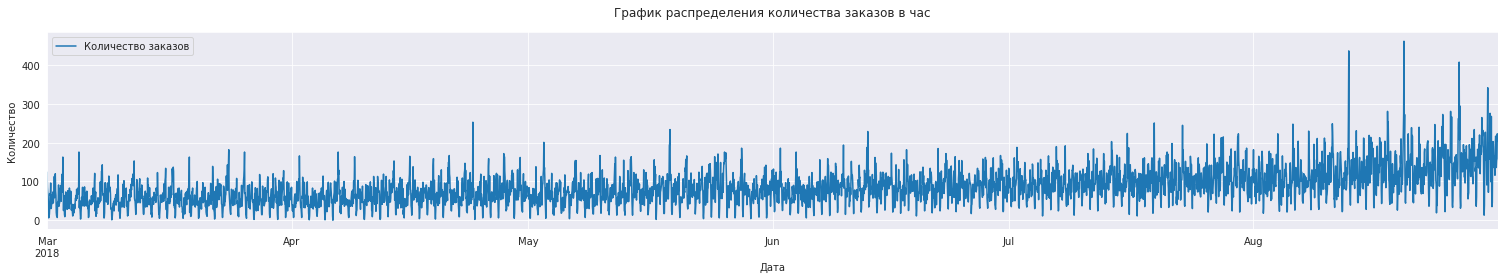

График за месяц


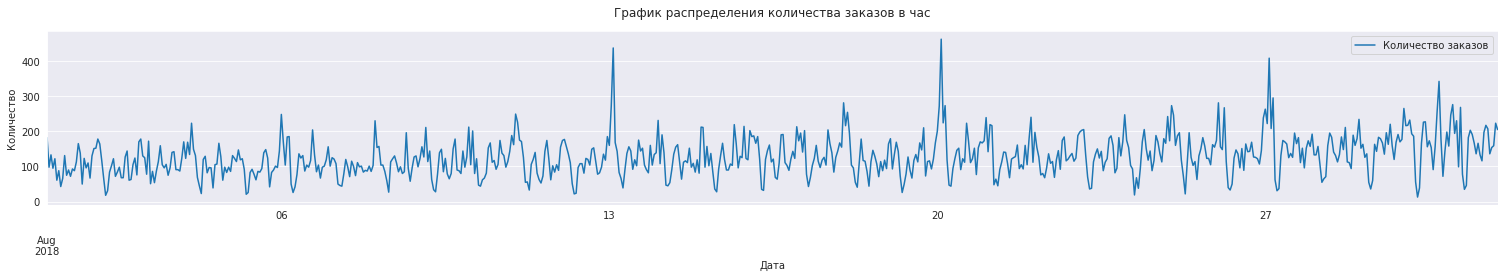

График за три дня


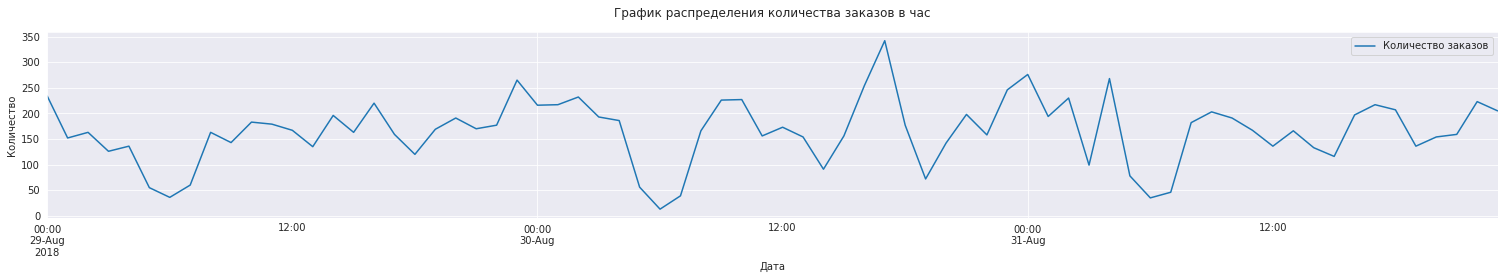

In [6]:
make_plot(df_1h, 'График распределения количества заказов в час', None, None)

График за весь срок


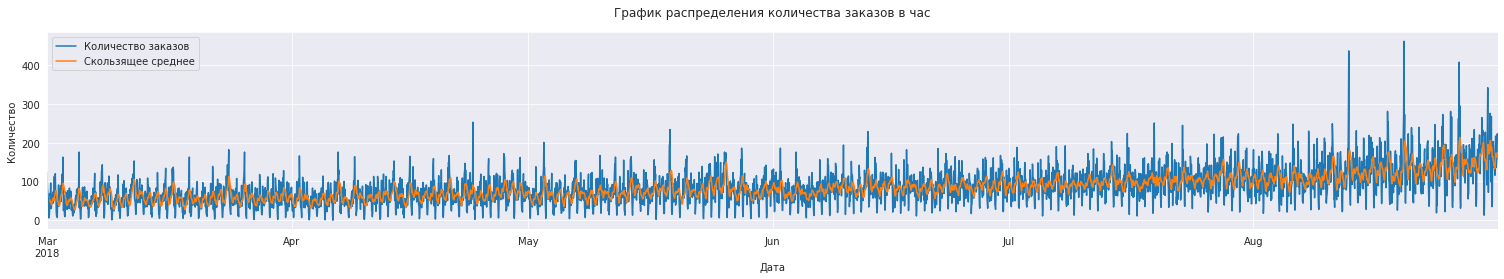

График за месяц


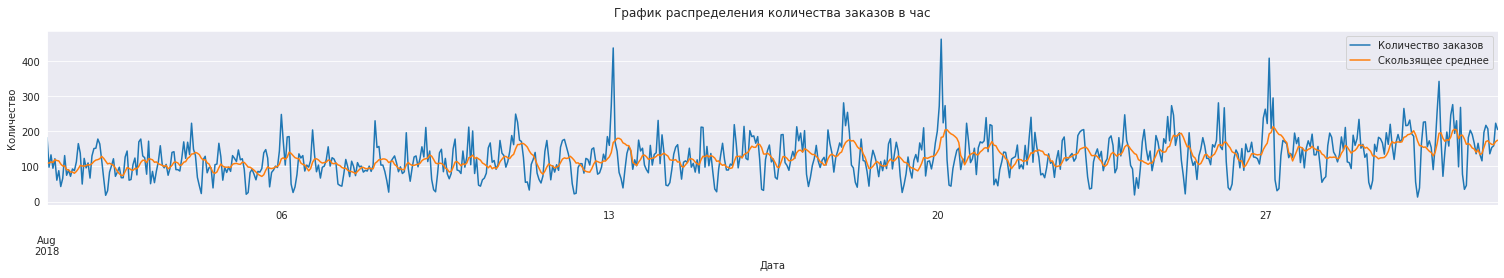

График за три дня


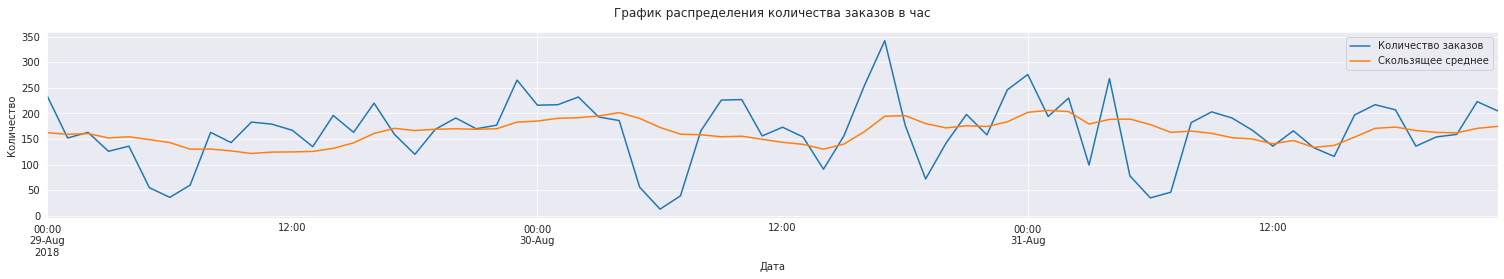

In [7]:
make_plot(df_1h, 'График распределения количества заказов в час', df_1h.rolling(10).mean(), 'Скользящее среднее')

На графике за весь срок видно, что среднее количество заказов растёт. Постараемся определеть сезонность или тренд в количестве заказов
Рассмотрим тернды, сезонность, остаток декомпозиции заказа такси.

### Тренд

Определим тренд.

In [8]:
decomposed_df = seasonal_decompose(df_1h)

График за весь срок


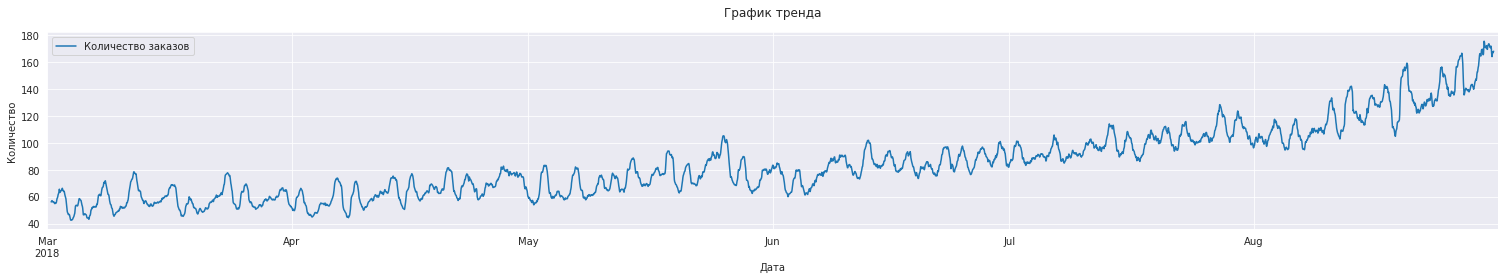

График за месяц


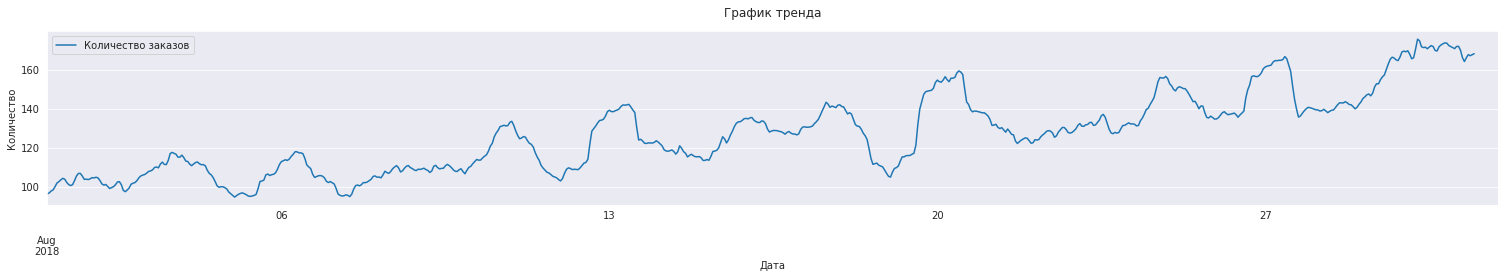

График за три дня


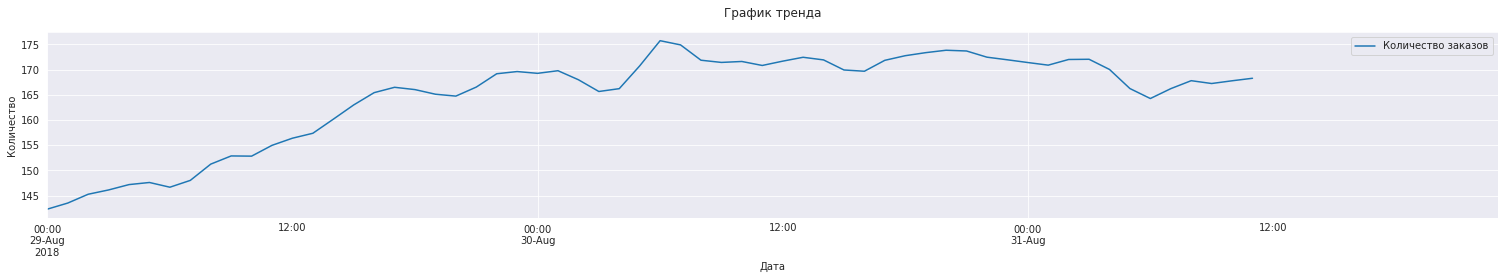

In [9]:
make_plot(decomposed_df.trend, 'График тренда', None, None)

Явно выраженный ежемесячный тренд роста количества заказов начиная с марта 2018 года. Определим стандартное отклонение за весь период времени.

In [10]:
print('Стандартное отклонение: ',decomposed_df.trend.std())

Стандартное отклонение:  26.31141879619486


### Сезонность

График за весь срок


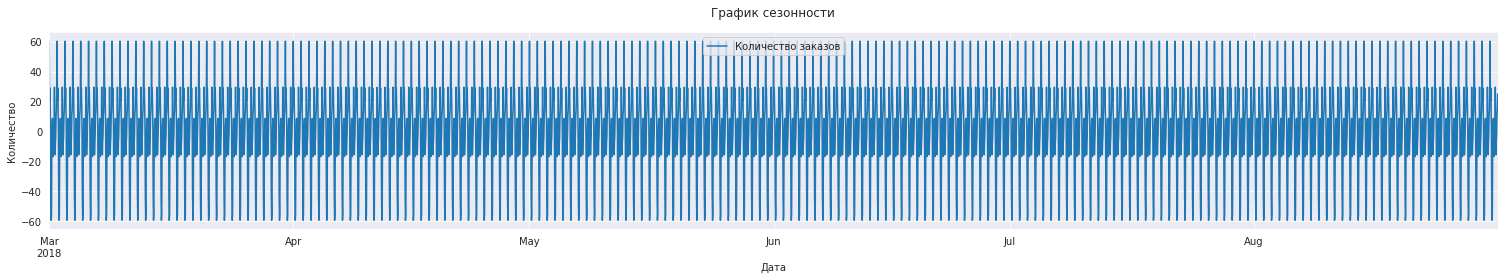

График за месяц


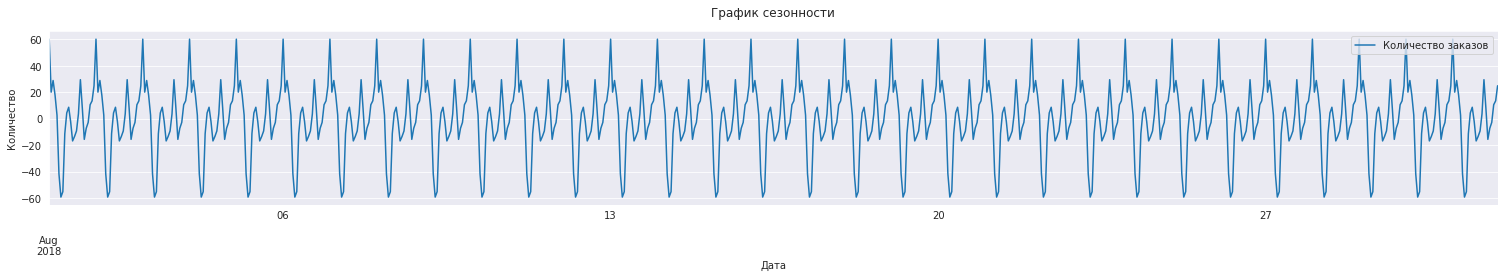

График за три дня


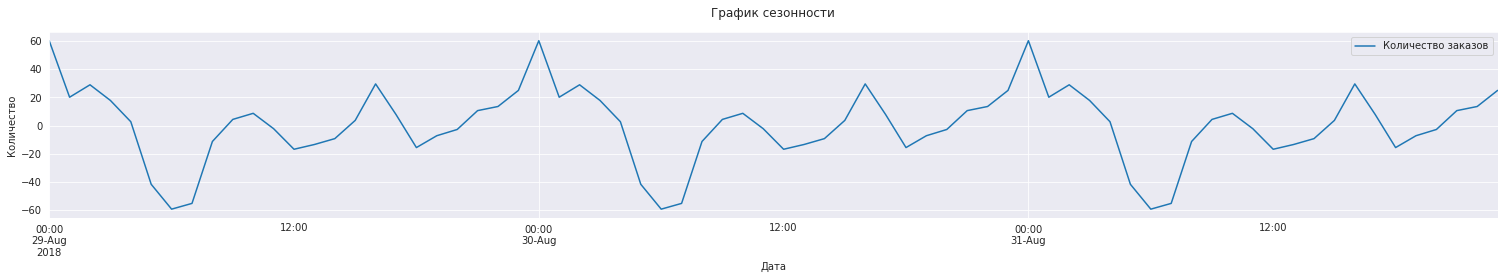

In [11]:
make_plot(decomposed_df.seasonal, 'График сезонности', None, None )

На графике сезонности явно выраженный стационарный временной ряд, у которого среднее значение и стандартное отклонение не изменяются с течением времени.


На графике за 3 дня видно, что на всех 3 днях:
- падение заказов и минимум в районе 06:00 и 18:00
- рост заказов и максимум в районе 09:00 и 00:00

### Остаток декомпозиции

График за весь срок


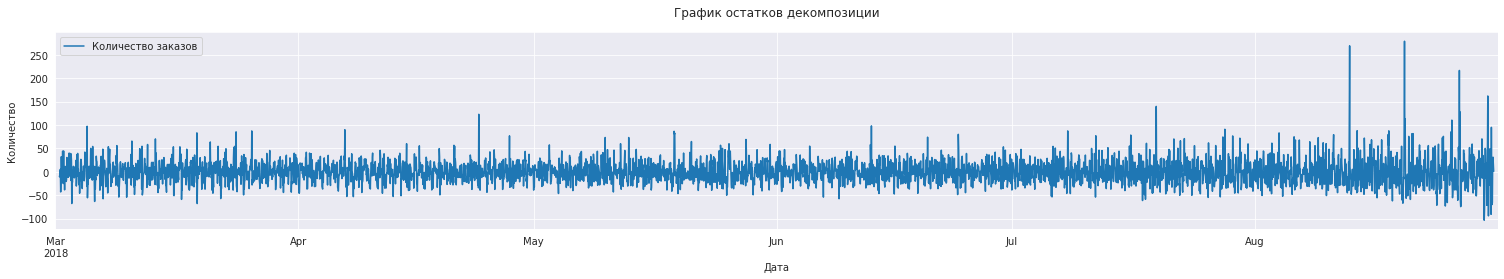

График за месяц


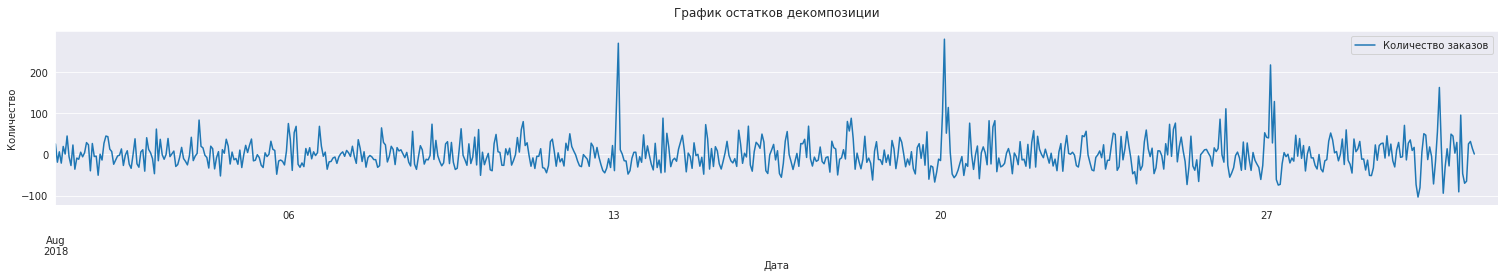

График за три дня


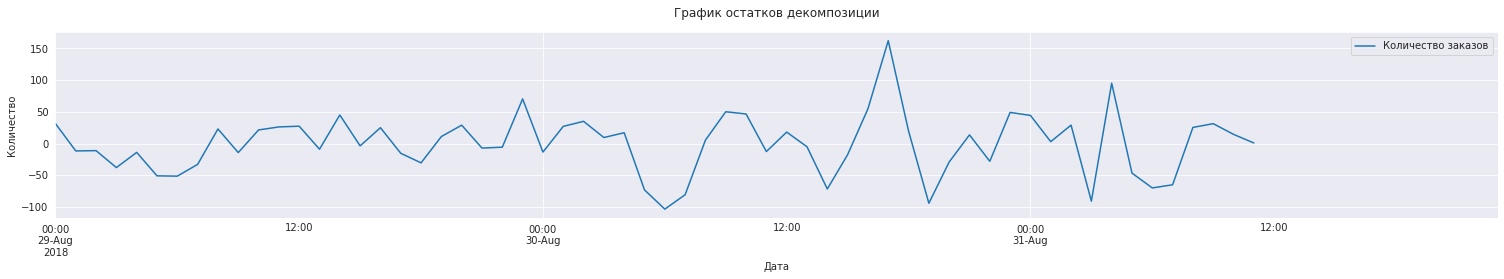

In [12]:
make_plot(decomposed_df.resid, 'График остатков декомпозиции', None, None)

<AxesSubplot:xlabel='datetime'>

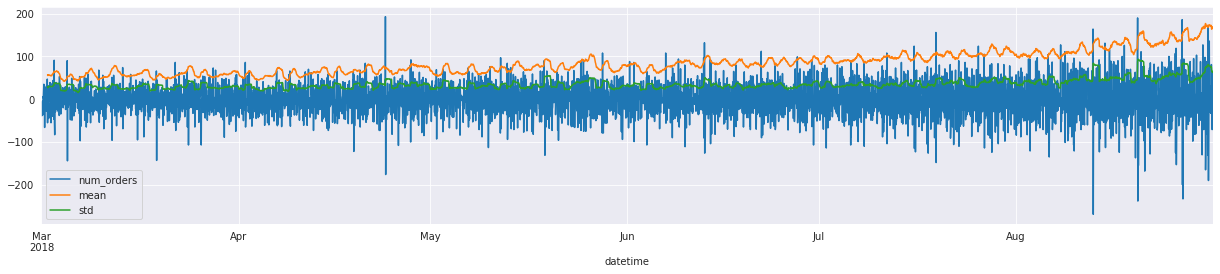

In [13]:
shift_df = df_1h - df_1h.shift()
shift_df['mean'] = df_1h['num_orders'].rolling(24).mean()
shift_df['std'] = df_1h['num_orders'].rolling(24).std()
shift_df.plot(figsize=figsize)

### Вывод
- Проанализирвоали исходные данные;
- Тренд идет на явное возрастание, то есть он не стационарный - это видно и на графике тренда, и на графике ресемплированных по 1 часу данных. Даже если убрать тренд и сезонность, то на графике остатков все равно видны всплески.
- Есть явная суточная сезонность - больше всего заказов 09:00 и 00:00, меньше всего в районе 06:00 и 18:00.
- Дни по кол-ву заказов отличаются друг от друга, то есть надо будет учесть день недели.

## Обучение

### Признаки для обучения моделей

Необходимые нам признаки для обучения моделей:

- **День недели** - так как видна зависимость от дня недеди на графике тренда за месяц;
- **Час** - цель: предсказать данные на определнный час, поэтому час - необходимый признак;
- **lag** 
- **rolling_mean** 

Для добавления признаков в датасет, создадим функцию.

In [14]:
def make_features(data, max_lag, rolling_mean_size):
    data = data.copy()
    data['dayofweek'] = data.index.dayofweek
    data['hour'] = data.index.hour
    #data['day'] = data.index.day
    #data['month'] = data.index.month
    
    for lag in range(1, max_lag + 1):
        data['lag_{}'.format(lag)] = data['num_orders'].shift(lag)

    data['rolling_mean'] = data['num_orders'].shift().rolling(rolling_mean_size).mean()
    
    return data

In [15]:
df_with_features = make_features(df_1h, 4, 24)
df_with_features.head(10)

,num_orders,dayofweek,hour,lag_1,lag_2,lag_3,lag_4,rolling_mean
datetime,,,,,,,,
2018-03-01 00:00:00,124,3,0,NaN,NaN,NaN,NaN,NaN
2018-03-01 01:00:00,85,3,1,124.0,NaN,NaN,NaN,NaN
2018-03-01 02:00:00,71,3,2,85.0,124.0,NaN,NaN,NaN
2018-03-01 03:00:00,66,3,3,71.0,85.0,124.0,NaN,NaN
2018-03-01 04:00:00,43,3,4,66.0,71.0,85.0,124.0,NaN
2018-03-01 05:00:00,6,3,5,43.0,66.0,71.0,85.0,NaN
2018-03-01 06:00:00,12,3,6,6.0,43.0,66.0,71.0,NaN
2018-03-01 07:00:00,15,3,7,12.0,6.0,43.0,66.0,NaN
2018-03-01 08:00:00,34,3,8,15.0,12.0,6.0,43.0,NaN


### Разделение на выборки

Обучим разные модели с различными гиперпараметрами. Сделаем тестовую выборку размером 10% от исходных данных.

Разделим данные на обучающую и тестовую выборки в соотношении 9:1.

Перемешивать выборки в задаче прогнозирования временного ряда нельзя, поэтому укажем аргумент shuffle (с англ. «перетасовывать») равным False, чтобы разделить данные корректно. 
Данные обучающей выборки должны предшествовать данным тестовой. Иначе тестирование модели будет некорректным: модель не должна обучаться на данных из будущего

In [16]:
df_with_features.dropna(inplace=True)

features = df_with_features.drop('num_orders', axis=1)
target = df_with_features['num_orders']

features_train, features_test, target_train, target_test = train_test_split(features, 
                                                                            target, 
                                                                            shuffle=False, 
                                                                            test_size=0.1)
print(features_train.shape)
print(features_test.shape)
print(target_train.shape)
print(target_test.shape)

(3952, 7)
(440, 7)
(3952,)
(440,)


In [17]:
print('Размеры выборок:')
print(f'train: {features_train.shape[0]} - {features_train.shape[0]/df_with_features.shape[0]:.0%}')
print(f'test: {features_test.shape[0]} - {features_test.shape[0]/df_with_features.shape[0]:.0%}')

Размеры выборок:
train: 3952 - 90%
test: 440 - 10%


Обучим четыре модели: 
- линейную регрессию (Linear Regression), 
- случайный лес (Random Forest), 
- градиентный бустинг LightGBM 
- градиентный бустинг CatBoost. 

Для последних трёх моделей применим поиск гиперпараметров с помощью GridSearchCV. 
Качество моделей оценим кросс-валидацией с метрикой RMSE и разделением на фолды TimeSeriesSplit.

In [18]:
tscv = TimeSeriesSplit(n_splits=5)

### LinearRegression

In [19]:
%%time

scores = cross_val_score(LinearRegression(), features_train, target_train, scoring='neg_root_mean_squared_error', cv=tscv)

lr_RMSE = scores.mean() * -1
print(f"RMSE: {lr_RMSE:.1f}")

RMSE: 31.7
CPU times: user 42.3 ms, sys: 476 µs, total: 42.8 ms
Wall time: 29.4 ms


### RandomForestRegression

In [20]:
%%time
model_rf = RandomForestRegressor(random_state=RANDOM_STATE)

param_grid_rf = {
    'n_estimators': range(1, 505, 100), 
    'max_depth': range(17, 19)
}

gs_rf = GridSearchCV(
    model_rf, 
    param_grid=param_grid_rf, 
    n_jobs=-1, 
    cv=tscv,
    scoring='neg_root_mean_squared_error')

gs_rf.fit(features_train, target_train)
print(f'best_params: {gs_rf.best_params_}')

best_params: {'max_depth': 17, 'n_estimators': 501}
CPU times: user 1min 54s, sys: 815 ms, total: 1min 55s
Wall time: 1min 55s


In [21]:
results_rf = gs_rf.cv_results_
best_index_rf = gs_rf.best_index_

rf_RMSE = results_rf['mean_test_score'][best_index_rf] * -1

print(f"Best RMSE: {rf_RMSE}")

Best RMSE: 25.381628480582158


### LightGBM

In [22]:
%%time
model_lgbm = LGBMRegressor(random_state=RANDOM_STATE, n_jobs=-1)

param_grid_lgbm = {
    'metric': ['rmse'],
    'boosting_type': ['gbdt'], #, 'dart']
    'n_estimators': [1000],
    'max_depth': [-1, 10]
}

gs_lgbm = GridSearchCV(
        model_lgbm, 
        param_grid=param_grid_lgbm, 
        n_jobs=-1, 
        cv=tscv,
        scoring='neg_root_mean_squared_error',
        verbose=1,
        error_score='raise'
)

gs_lgbm.fit(features_train, target_train)
print(f'best_params: {gs_lgbm.best_params_}')

Fitting 5 folds for each of 2 candidates, totalling 10 fits
best_params: {'boosting_type': 'gbdt', 'max_depth': 10, 'metric': 'rmse', 'n_estimators': 1000}
CPU times: user 1min 53s, sys: 1.05 s, total: 1min 54s
Wall time: 1min 55s


In [23]:
results_lgbm = gs_lgbm.cv_results_
best_index_lgbm = gs_lgbm.best_index_

lgbm_RMSE = results_lgbm['mean_test_score'][best_index_lgbm] * -1

print(f"Best RMSE: {lgbm_RMSE}")

Best RMSE: 26.588816810625968


### CatBoost

In [24]:
%%time
model_catboost = CatBoostRegressor(random_state=RANDOM_STATE, verbose=False)

param_grid_catboost = {
    'iterations': range(100, 501, 100),
    'learning_rate': [0.05, 0.1],
    'depth': range(2, 9, 3)
}

gs_catboost = GridSearchCV(
        model_catboost, 
        param_grid=param_grid_catboost,  
        cv=tscv,
        scoring='neg_root_mean_squared_error'
)

gs_catboost.fit(features_train, target_train)
print(f'best_params: {gs_catboost.best_params_}')

best_params: {'depth': 5, 'iterations': 500, 'learning_rate': 0.05}
CPU times: user 1min 7s, sys: 3.89 s, total: 1min 11s
Wall time: 2min 17s


In [25]:
results_catboost = gs_catboost.cv_results_
best_index_catboost = gs_catboost.best_index_

catboost_RMSE = results_catboost['mean_test_score'][best_index_catboost] * -1

print(f"Best RMSE: {catboost_RMSE}")

Best RMSE: 25.399100150774956


### Вывод

Для выбора лучшей модели, сравним полученыые метрики RMSE.

In [26]:
result = pd.DataFrame(
     [lr_RMSE, rf_RMSE, lgbm_RMSE, catboost_RMSE] , 
    index=['LinearRegression','RandomForestRegressor', 'LightGBM', 'CatBoost'], 
    columns=['RMSE']
)
result

,RMSE
LinearRegression,31.671323
RandomForestRegressor,25.381628
LightGBM,26.588817
CatBoost,25.399100


На обучающей выборке лучший результат показала модель RandomForestRegressor с гиперапараметрами: 'max_depth': 17, 'n_estimators': 501.

**Выводы раздела "Обучение":**
- резделили данные на обучающую и тетсову выборки;
- обучили четыре модели (Linear Regression, Random Forest, LightGBM и CatBoost) с различными гиперпараметрами;
- наименьшее значение метрики у модели **RandomForestRegressor** на обучающей выборке.

## Тестирование

1. Проверим лучшую модель (RandomForestRegressor) на  тестовых данных. Метрика должна быть меньше 48.
2. Визуализируем результаты предсказания модели, посторим график исходных и предсказанных данных.

In [32]:
def make_two_plots(target_data, predicted_data):
    plt.figure(figsize=figsize)
    plt.plot(target_data.index, 
             target_data,  
             target_data.index, 
             predicted_data)
    plt.title('График реальных значений целевого признака и предсказаний')
    plt.xlabel('Дата/время')
    plt.ylabel('Число заказов')
    plt.legend(['Реальные значения', 'Предсказанные значения'])
    plt.show()

### RandomForestRegression

45.94443635028075


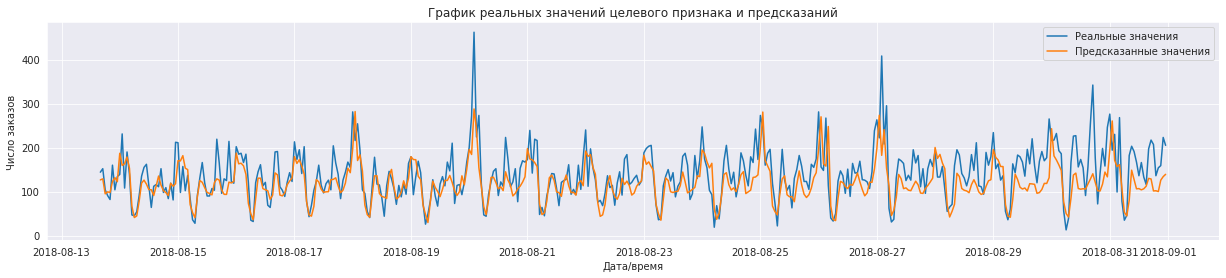

CPU times: user 415 ms, sys: 16.1 ms, total: 431 ms
Wall time: 426 ms


In [34]:
%%time

target_predict_rf = gs_rf.predict(features_test)
final_RMSE_rf = mean_squared_error(target_test, target_predict_rf) ** 0.5

print(final_RMSE_rf)

make_two_plots(target_test, target_predict_rf)

### Вывод

Выбранная модель **RandomForestRegression**  на тестовых данных имеет метрику RMSE равной 45.94. Это удовлетворяет условием проекта.

Таким образом для прогнозирования количество заказов такси на следующий час, рекомендуем использовать модель **RandomForestRegression** с гиперпараметрами:
- max_depth: 17, 
- n_estimators: 501.

**Выводы раздела "Тестирование":**
- Проверили качество лучшей модели на тестовой выборке;
- пострили графики зависимости истинных и предсказанных значений количества заказов от времени.
